# Importing Libraries and Dataset Description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import re
import requests
from spacy import displacy
import bs4
import networkx as nx
from tqdm import tqdm
from spacy.matcher import Matcher
from spacy.tokens import Span
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
candidate_sentences = pd.read_csv('/content/wiki_sentences_v2.csv')
candidate_sentences.head()

sentence
0  confused and frustrated, connie decides to leave on her own.
1             later, a woman’s scream is heard in the distance.
2                      christian is then paralyzed by an elder.
3                                    the temple is set on fire.
4                             outside, the cult wails with him.

In [ ]:
candidate_sentences.shape

(4318, 1)

In [ ]:
candidate_sentences['sentence'][0]

'confused and frustrated, connie decides to leave on her own.'

# NLP Techniques

**Tokenization**: Splitting the sentence into individual tokens (words and punctuation).

In [ ]:
def tokenize(sentence):
    tokens = []
    current_token = ''
    for char in sentence:
        if char.isspace() or char in ',.!?':
            if current_token:
                tokens.append(current_token)
                current_token = ''
            if char in ',.!?':
                tokens.append(char)
        else:
            current_token += char
    if current_token:
        tokens.append(current_token)
    return tokens

In [ ]:
sentence = ''
for cs in candidate_sentences['sentence']:
    sentence += cs

tokens = tokenize(sentence)
print("Tokens:", tokens)

Tokens: ['confused', 'and', 'frustrated', ',', 'connie', 'decides', 'to', 'leave', 'on', 'her', 'own', '.', 'later', ',', 'a', 'woman’s', 'scream', 'is', 'heard', 'in', 'the', 'distance', '.', 'christian', 'is', 'then', 'paralyzed', 'by', 'an', 'elder', '.', 'the', 'temple', 'is', 'set', 'on', 'fire', '.', 'outside', ',', 'the', 'cult', 'wails', 'with', 'him', '.', "it's", 'a', 'parable', 'of', 'a', "woman's", 'religious', 'awakening—c', '.', 'mackenzie', ',', 'and', 'craig', 'vincent', 'joined', 'the', 'cast', '.', 'later', ',', 'craig', 'di', 'francia', 'and', 'action', 'bronson', 'were', 'revealed', 'to', 'have', 'joined', 'the', 'cast', '.', 'sebastian', 'maniscalco', 'and', 'paul', 'ben-victor', 'were', 'later', 'revealed', 'as', 'being', 'part', 'of', 'the', 'cast', '.', 'we', 'just', 'tried', 'to', 'make', 'the', 'film', '.', 'we', 'went', 'through', 'all', 'these', 'tests', 'and', 'things', 'm', 'global', 'was', 'also', 'circling', 'to', 'bid', 'for', 'the', "film's", 'internat

**Part-of-speech (POS) Tagging**: Assigning grammatical categories (tags) to each token.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import StanfordTagger

text_tok = nltk.word_tokenize(sentence)
pos_tagged = nltk.pos_tag(text_tok)
pos_tagged

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('confused', 'VBN'),
 ('and', 'CC'),
 ('frustrated', 'VBN'),
 (',', ','),
 ('connie', 'VBZ'),
 ('decides', 'NNS'),
 ('to', 'TO'),
 ('leave', 'VB'),
 ('on', 'IN'),
 ('her', 'PRP'),
 ('own.later', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('woman', 'NN'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('scream', 'NN'),
 ('is', 'VBZ'),
 ('heard', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('distance.christian', 'NN'),
 ('is', 'VBZ'),
 ('then', 'RB'),
 ('paralyzed', 'VBN'),
 ('by', 'IN'),
 ('an', 'DT'),
 ('elder.the', 'JJ'),
 ('temple', 'NN'),
 ('is', 'VBZ'),
 ('set', 'VBN'),
 ('on', 'IN'),
 ('fire.outside', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('cult', 'NN'),
 ('wails', 'VBZ'),
 ('with', 'IN'),
 ('him.it', 'NN'),
 ("'s", 'POS'),
 ('a', 'DT'),
 ('parable', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('woman', 'NN'),
 ("'s", 'POS'),
 ('religious', 'JJ'),
 ('awakening—c', 'NN'),
 ('.', '.'),
 ('mackenzie', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('craig', 'JJ'),
 ('vincent', 'NN'),
 ('joined', 'VBD'),
 ('the', 'DT'),
 ('cast.l

Building **Wordclouds**

In [ ]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and punctuation from a sentence
def preprocess_text(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)

    # Remove stopwords and punctuation
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token not in string.punctuation]

    # Join the filtered tokens back into a sentence
    processed_sentence = ' '.join(filtered_tokens)

    return processed_sentence

# Apply preprocessing to each sentence in the DataFrame column
candidate_sentences['processed_sentence'] = candidate_sentences['sentence'].apply(preprocess_text)
candidate_sentences.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentence  \
0  confused and frustrated, connie decides to leave on her own.   
1             later, a woman’s scream is heard in the distance.   
2                      christian is then paralyzed by an elder.   
3                                    the temple is set on fire.   
4                             outside, the cult wails with him.   

                         processed_sentence  
0  confused frustrated connie decides leave  
1       later woman ’ scream heard distance  
2                 christian paralyzed elder  
3                           temple set fire  
4                        outside cult wails

Wordcloud for **MUSIC DIRECTORS**

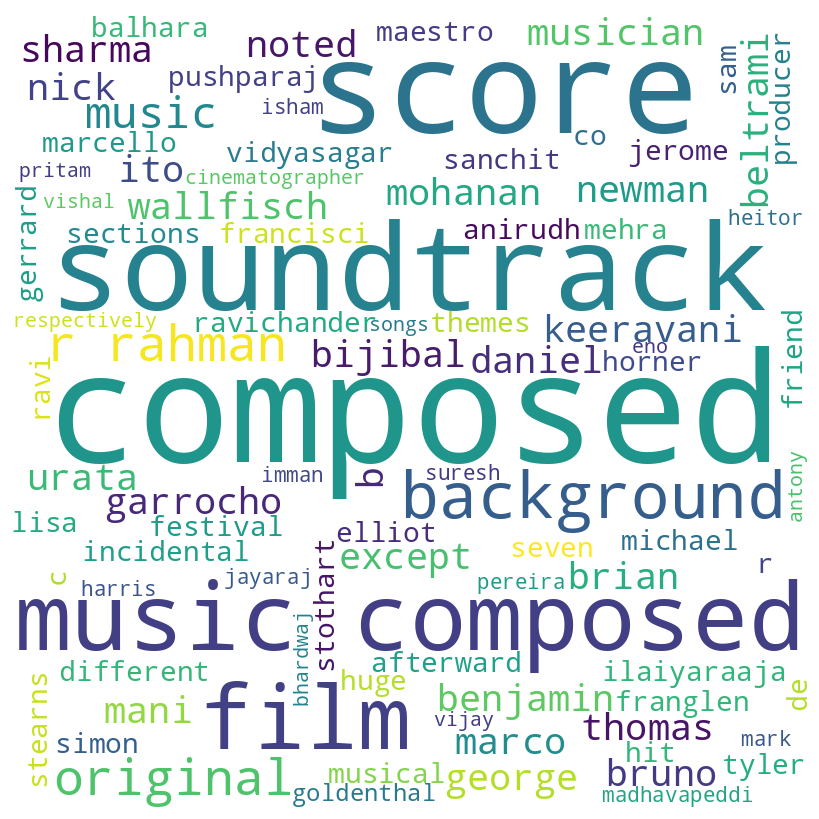

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty list to store composed sentences
composed_sentences = []

# Function to check if a sentence contains the phrase "composed"
def contains_composed_by(sentence):
    return 'composed' in sentence.lower()

# Append composed sentences to the list
composed_sentences.extend(candidate_sentences[candidate_sentences['processed_sentence'].apply(contains_composed_by)]['processed_sentence'])

# Join the composed sentences into a single string
composed_sent = ' '.join(composed_sentences)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(composed_sent)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Wordcloud for **DIRECTORS/LYRICISTS/GENRE/LANGUAGE**

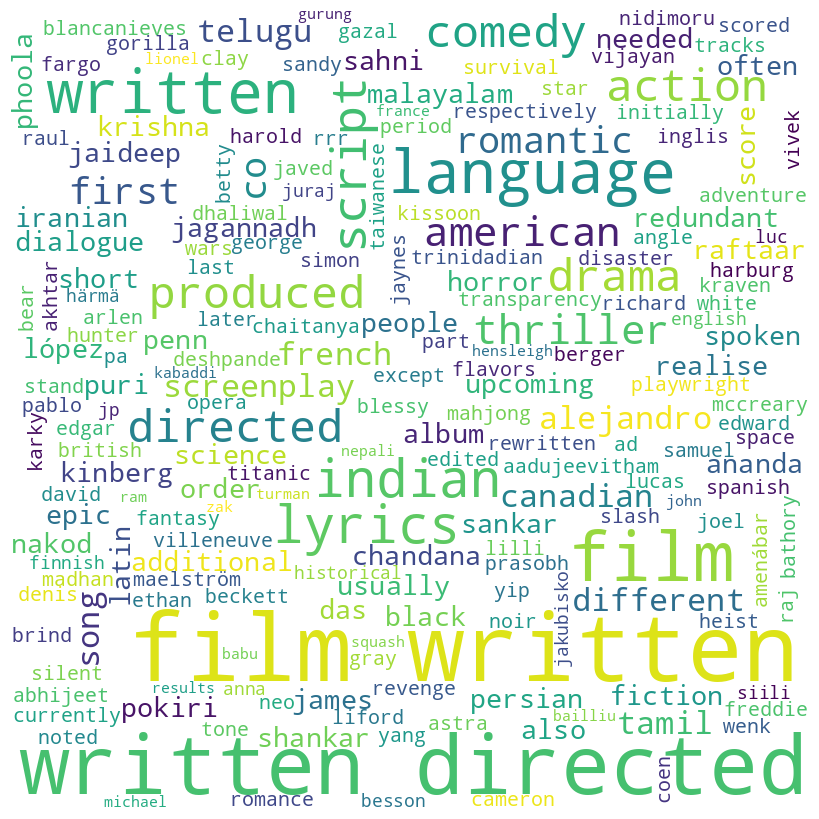

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty list to store written sentences
written_sentences = []

# Function to check if a sentence contains the phrase "written"
def contains_written_by(sentence):
    return 'written' in sentence.lower()

# Append written sentences to the list
written_sentences.extend(candidate_sentences[candidate_sentences['processed_sentence'].apply(contains_written_by)]['processed_sentence'])

# Join the written sentences into a single string
written_sent = ' '.join(written_sentences)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(written_sent)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Wordcloud for **PRODUCERS**

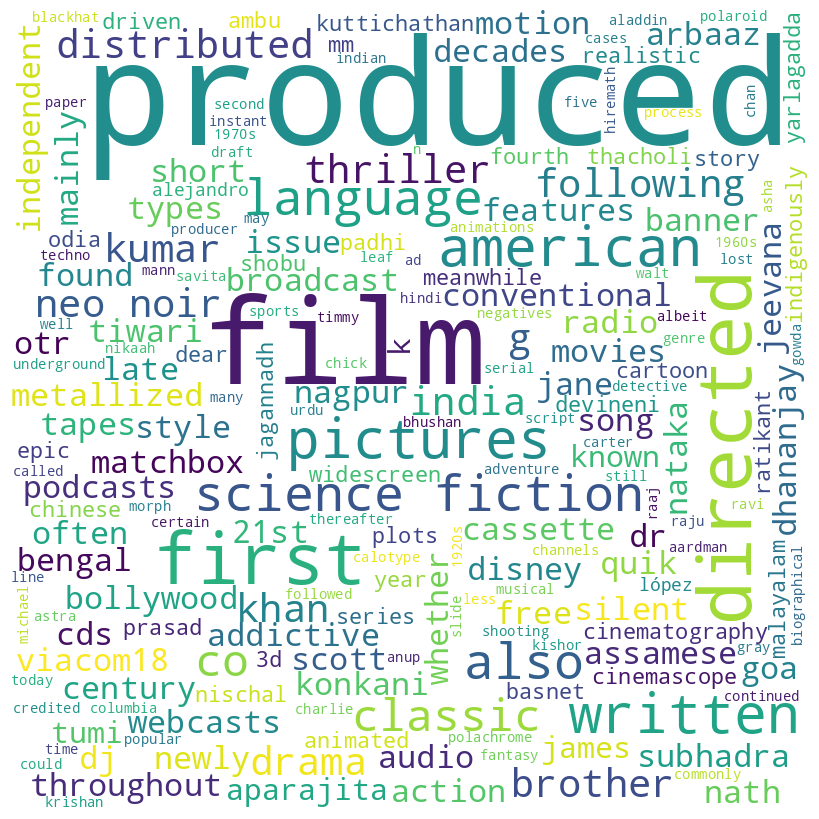

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty list to store producer sentences
producer_sentences = []

# Function to check if a sentence contains the phrase "produced"
def contains_produced_by(sentence):
    return 'produced' in sentence.lower()

# Append producer sentences to the list
producer_sentences.extend(candidate_sentences[candidate_sentences['processed_sentence'].apply(contains_produced_by)]['processed_sentence'])

# Join the producer sentences into a single string
producer_sent = ' '.join(producer_sentences)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(producer_sent)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Entity Pair Extraction

In [ ]:
def get_entities(sent):
    ent1 = ""
    ent2 = ""

    prv_tok_dep = "" # dependency tag for previous token in the sentence.
    prv_tok_text = "" # previous token in the sentence.

    prefix = ""
    modifier = ""

    for tok in nlp(sent):
      if tok.dep_ !="punct": # Check token is a punctuation or not.
        if tok.dep_ == "compound": # Check token is a compound word or not.
          prefix = tok.text
          if prv_tok_dep == "compound": # Add compunds together.
            prefix = prv_tok_text + " " + tok.text

        if tok.dep_.endswith("mod") == True:
          modifier = tok.text
          if prv_tok_dep == "compound":
            modifier = prv_tok_text + " " + tok.text

        if tok.dep_.find("subj") == True:
          ent1 = modifier + " " + prefix + " " + tok.text
          prefix = ""
          modifier = ""
          prv_tok_dep = ""
          prv_tok_text = ""

        if tok.dep_.find("obj") == True:
          ent2 = modifier + " " + prefix + " " + tok.text

        prv_tok_text = tok.text
        prv_tok_dep = tok.dep_
    return [ent1.strip(),ent2.strip()]

In [ ]:
get_entities("The film won 20 oscars")

['film', '20  oscars']

In [ ]:
entity_pairs = []

for i in tqdm(candidate_sentences['sentence']):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [01:18<00:00, 55.14it/s]


In [ ]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m', 'international sales rights'],
 ['canadian musician robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['military  forces', 'arrest'],
 ['train', 'vuk'],
 ['kota eberhardt', 'telepath selene gallio'],
 ['singer', 'men']]

# Relation Extraction

In [ ]:
def get_relation(sent):
  doc = nlp(sent)

  matcher = Matcher(nlp.vocab)
  pattern = [{'DEP':'ROOT'},
             {'DEP':'prep','OP':'?'},
             {'DEP':'agent','OP':'?'},
             {'POS':'ADJ','OP':'?'}
             ]
  matcher.add("matching_1",[pattern])

  matches = matcher(doc)
  k = len(matches)-1

  span = doc[matches[k][1]:matches[k][2]]
  return (span.text)

In [ ]:
get_relation('John is a good boy')

'is'

In [ ]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 4318/4318 [01:14<00:00, 57.63it/s] 


In [ ]:
pd.Series(relations).value_counts()[:50]

is               364
was              308
released on       90
are               74
include           73
were              68
released          41
's                39
composed by       34
have              31
became            31
has               30
become            28
released in       27
included          23
produced          21
had               21
been              20
used              19
called            19
made              18
considered        18
be                17
scheduled         17
stars             16
directed by       16
produced by       14
hired             14
written by        13
went              13
introduced in     13
received          13
wrote             13
sold              12
wanted            12
began             11
began in          11
won               11
set               11
cast as           11
directed          10
includes          10
gave              10
gives              9
said               9
features           9
produced in        9
going        

# Constructing Knowledge Graphs

In [ ]:
source = [i[0] for i in entity_pairs]
target = [i[1] for i in entity_pairs]

df = pd.DataFrame({'source':source,'target':target,'edge':relations})
df.sample(5)

source                      target          edge
731               griffith                      nation            's
2795     notable  openings                     germany  witnessed in
3483                  film          excellent  reviews      gathered
74    national film awards  prominent film award india            is
4288            lomography               110 film 2011           re-

In [ ]:
G = nx.from_pandas_edgelist(df,"source","target",edge_attr=True,create_using=nx.MultiDiGraph())

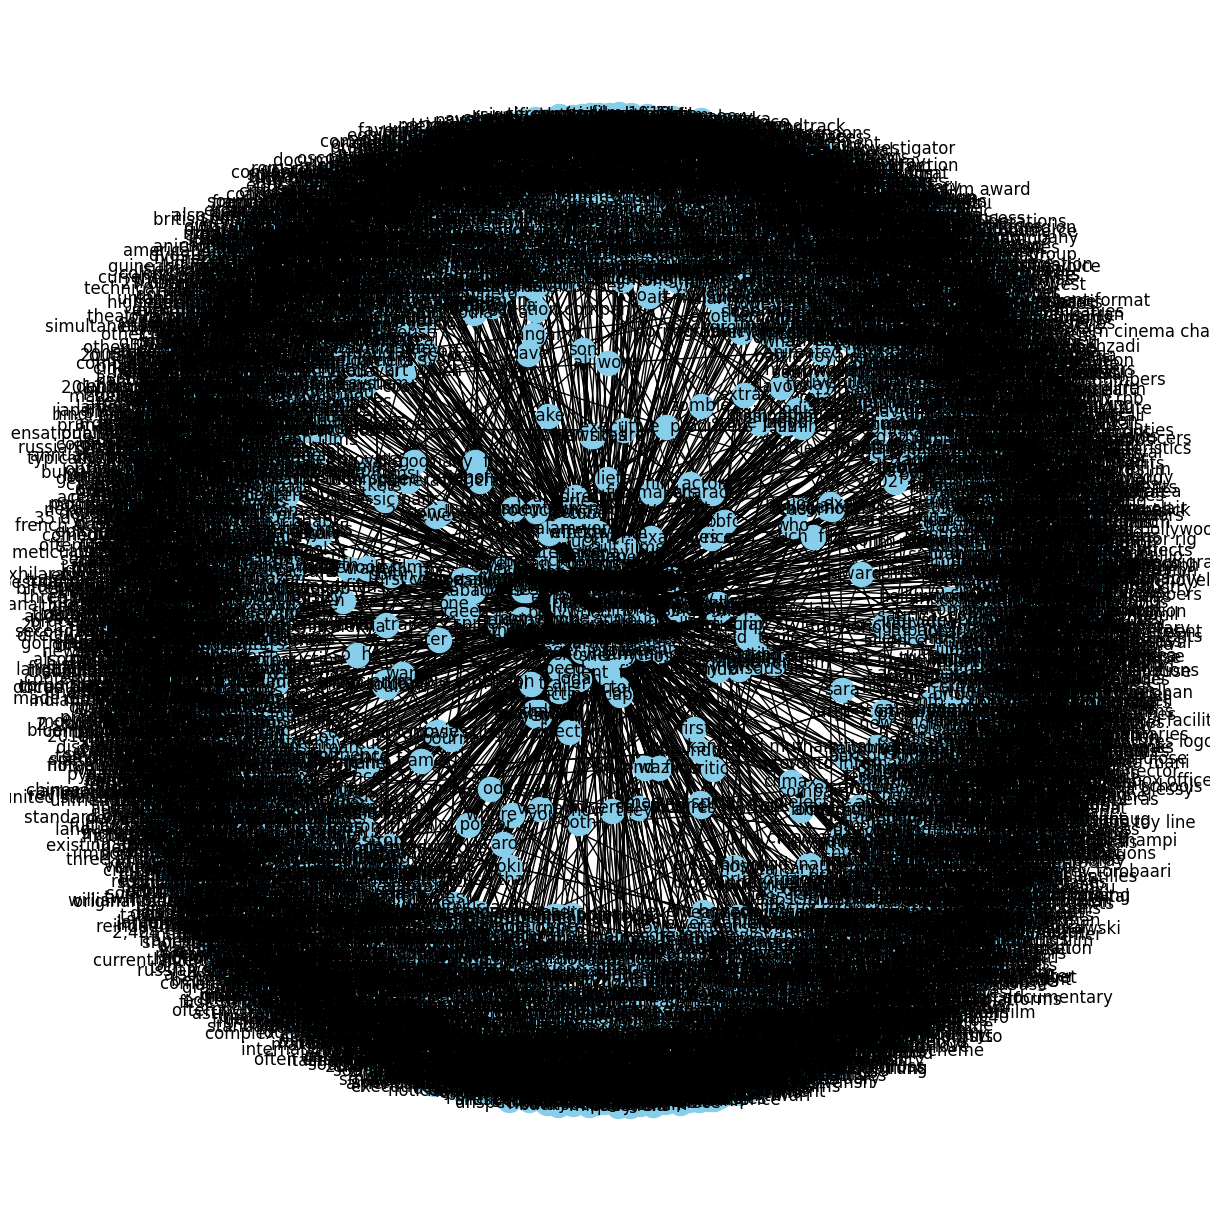

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

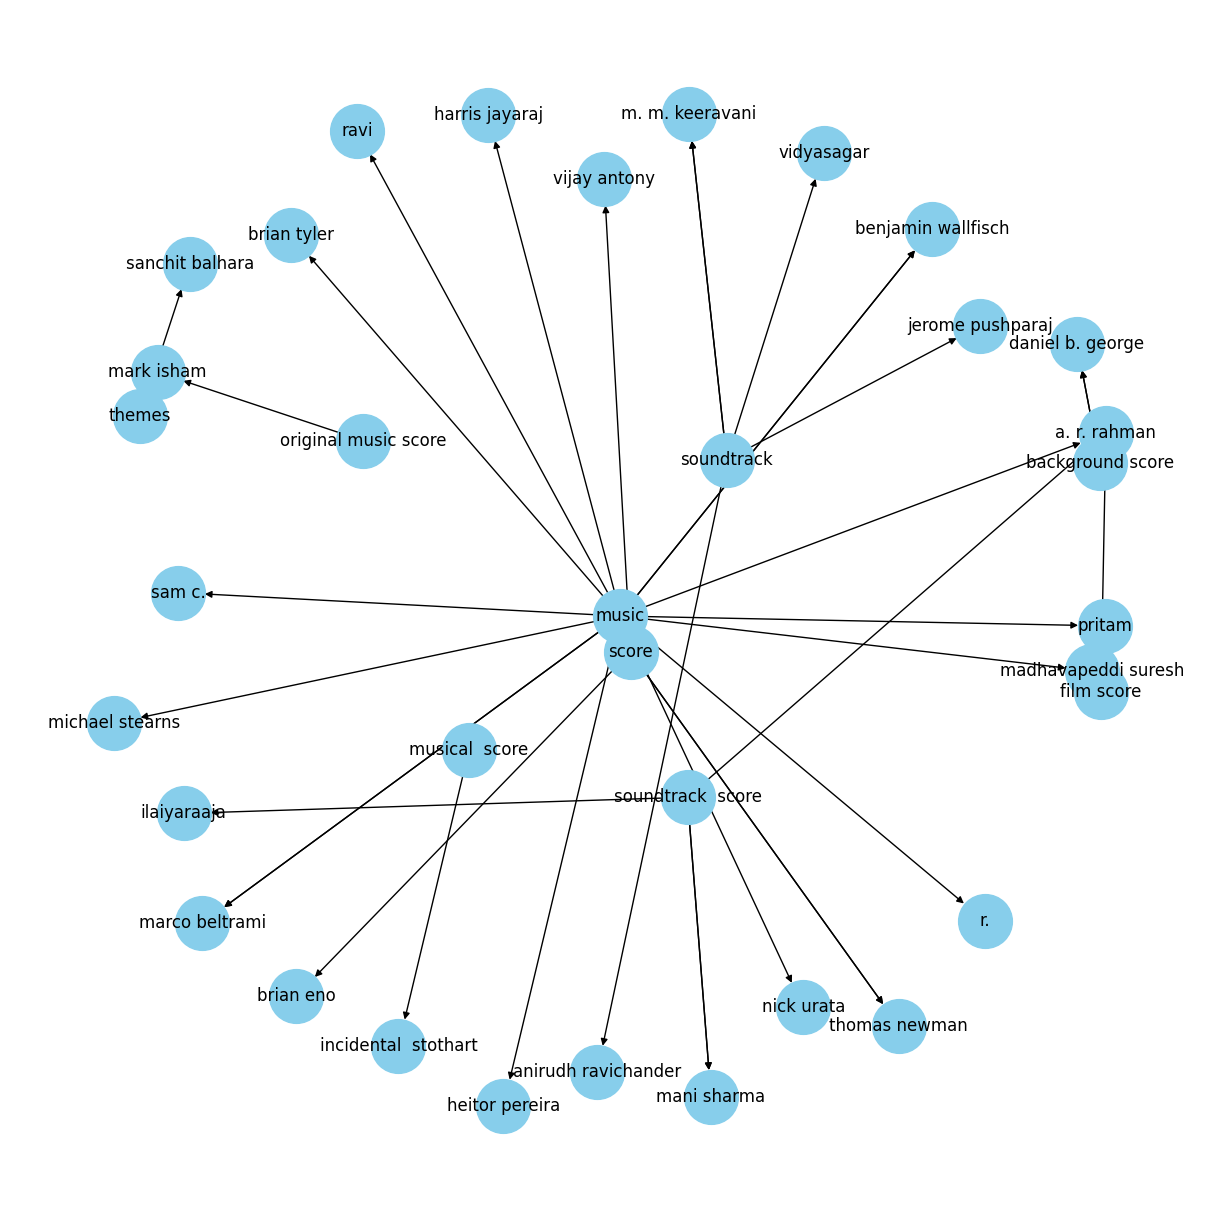

In [ ]:
G=nx.from_pandas_edgelist(df[df['edge']=="composed by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph()) # Consider only a single relation "Composed by"

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

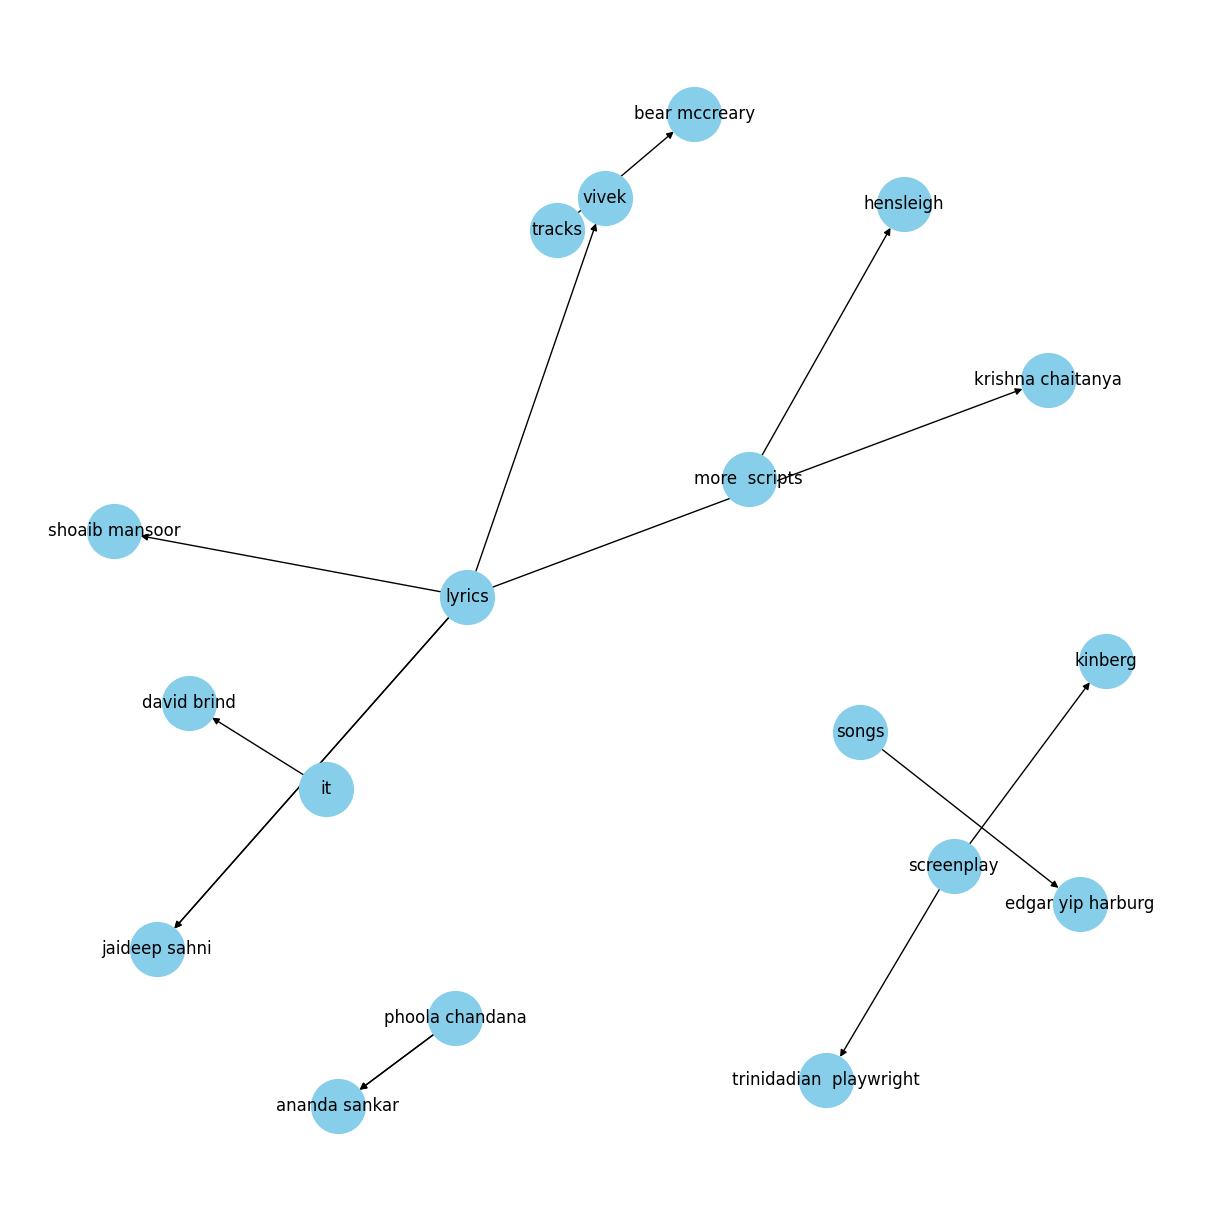

In [ ]:
G=nx.from_pandas_edgelist(df[df['edge']=="written by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph()) # Consider only a single relation "written by"

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

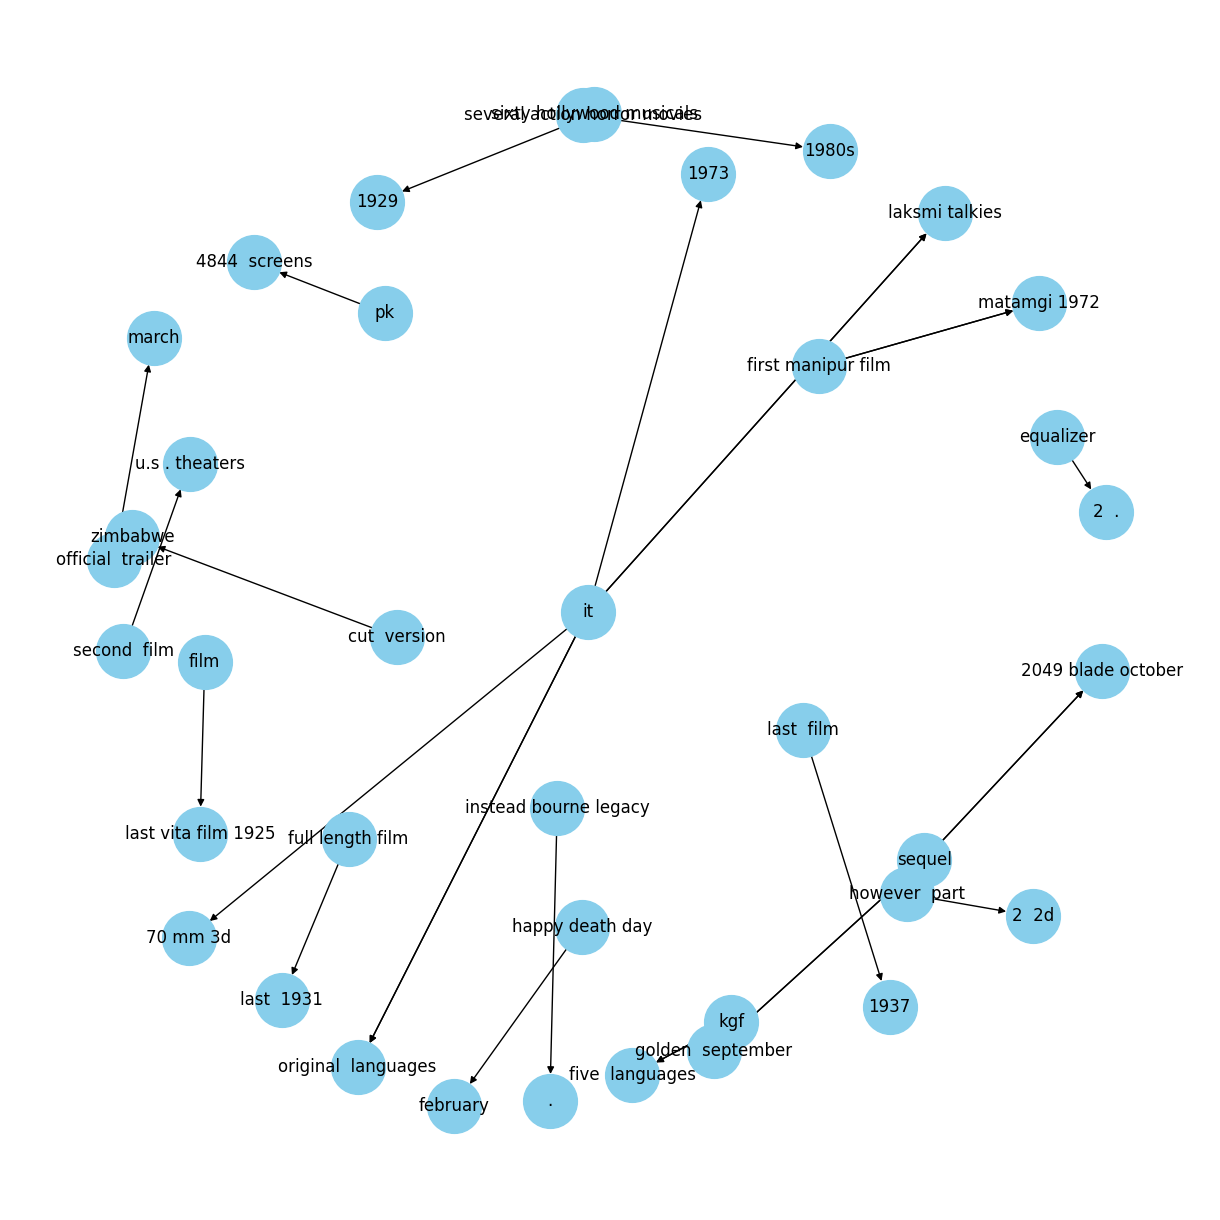

In [ ]:
G=nx.from_pandas_edgelist(df[df['edge']=="released in"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph()) # Consider only a single relation "released in"

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Question answering (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this code.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install accelerate

!apt install git-lfs

In [ ]:
!pip install wandb -qU

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

You will need to setup git, adapt your email and name in the following cell.

In [ ]:
!git config --global user.email "karthic2508@gmail.com"
!git config --global user.name "Karthic2508"

You will also need to be logged in to the Hugging Face Hub. Execute the following and enter your credentials.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset
import datasets

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "deepset/roberta-base-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
tokenizer.is_fast

True

In [ ]:
max_length = 384
stride = 128


def preprocess_training_examples(examples):
    G = nx.from_pandas_edgelist(df[df['edge']], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

    # Extract triplets from the knowledge graph
    triplets = []
    for u, v, data in G.edges(data=True):
        triplets.append((u, data['edge'], v))


    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    processed_triplets = []
    for triplet in triplets:
        subject = ' '.join([stemmer.stem(word) for word in triplet[0].split() if word.lower() not in stop_words])
        relation = ' '.join([stemmer.stem(word) for word in triplet[1].split() if word.lower() not in stop_words])
        object = ' '.join([stemmer.stem(word) for word in triplet[2].split() if word.lower() not in stop_words])
        processed_triplets.append((subject, relation, object))

    # Prepare the input for BERT
    context = ' '.join([f"{subj} {rel} {obj}" for subj, rel, obj in processed_triplets])
    input_ids = tokenizer.encode(question, context)
    token_type_ids = [0 if i <= input_ids.index(102) else 1 for i in range(len(input_ids))]
    start_scores, end_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([token_type_ids]))

    # Post-processing to extract the answer
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores) + 1
    answer = tokenizer.decode(input_ids[answer_start:answer_end])

    # Print the answer
    print(f"Answer: {answer}")
        questions = [q.strip() for q in examples["question"]]
        inputs = tokenizer(
            questions,
            examples["context"],
            max_length=max_length,
            truncation="only_second",
            stride=stride,
            return_overflowing_tokens=True,
            return_offsets_mapping=True,
            padding="max_length",
        )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
import pandas as pd
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_train.columns

Index(['item_id', 'domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp',
       'q_review_id', 'q_reviews_id', 'question', 'question_subj_level',
       'ques_subj_score', 'is_ques_subjective', 'review_id', 'review',
       'human_ans_spans', 'human_ans_indices', 'answer_subj_level',
       'ans_subj_score', 'is_ans_subjective'],
      dtype='object')

In [ ]:
df_train.iloc[0].question

'Who is the author of this series?'

In [ ]:
df_train.iloc[0].review

"Whether it be in her portrayal of a nerdy lesbian or a punk rock rebel, Maslany's plural personalities, (though very stereotypical), are entertaining eye-candy. Combined with a complex and unpredictable plot line, this show is surprisingly addictive. ANSWERNOTFOUND"

In [ ]:
df_train.iloc[0].human_ans_indices

'(251, 265)'

In [ ]:
df_train.iloc[0].review[251:265]

'ANSWERNOTFOUND'

In [ ]:
df_train=df_train[['question','human_ans_indices','review','human_ans_spans']]
df_test=df_test[['question','human_ans_indices','review','human_ans_spans']]

In [ ]:
import numpy as np
df_train['id']=np.linspace(0,len(df_train)-1,len(df_train))
df_test['id']=np.linspace(0,len(df_test)-1,len(df_test))

df_train['id']=df_train['id'].astype(str)
df_test['id']=df_test['id'].astype(str)

In [ ]:
int(df_train.iloc[0].human_ans_indices.split('(')[1].split(',')[0])

251

In [ ]:
float(df_train.iloc[0].human_ans_indices.split('(')[1].split(',')[1].split(' ')[1].split(')')[0])

265.0

In [ ]:
df_train['answers']=df_train['human_ans_spans']
df_test['answers']=df_test['human_ans_spans']

In [ ]:
for i in range(0,len(df_train)):
  answer1={}
  si=int(df_train.iloc[i].human_ans_indices.split('(')[1].split(',')[0])
  ei=int(df_train.iloc[i].human_ans_indices.split('(')[1].split(',')[1].split(' ')[1].split(')')[0])
  answer1['text']=[df_train.iloc[i].review[si:ei]]
  answer1['answer_start']=[si]
  df_train.at[i, 'answers']=answer1
  #print(df_train.iloc[i].answers,df_train.iloc[i].human_ans_spans)

In [ ]:
for i in range(0,len(df_test)):
  answer1={}
  si=int(df_test.iloc[i].human_ans_indices.split('(')[1].split(',')[0])
  ei=int(df_test.iloc[i].human_ans_indices.split('(')[1].split(',')[1].split(' ')[1].split(')')[0])
  answer1['text']=[df_test.iloc[i].review[si:ei]]
  answer1['answer_start']=[si]
  df_test.at[i, 'answers']=answer1
  #print(df_train.iloc[i].answers,df_train.iloc[i].human_ans_spans)

In [ ]:
df_train.columns

Index(['question', 'human_ans_indices', 'review', 'human_ans_spans', 'id',
       'answers'],
      dtype='object')

In [ ]:
df_train.columns=['question', 'human_ans_indices', 'context', 'human_ans_spans', 'id',
       'answers']

df_test.columns=['question', 'human_ans_indices', 'context', 'human_ans_spans','id',
       'answers']

In [ ]:
val_dataset2 = datasets.Dataset.from_pandas(df_test)
train_dataset2 = datasets.Dataset.from_pandas(df_train)


In [ ]:
train_dataset = train_dataset2.map(
    preprocess_training_examples,
    batched=True,
    remove_columns=train_dataset2.column_names,
)
len(train_dataset2), len(train_dataset)

Map:   0%|          | 0/2501 [00:00<?, ? examples/s]

(2501, 4862)

In [ ]:
train_dataset2.shape

(2501, 6)

In [ ]:
def preprocess_validation_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["id"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

In [ ]:
validation_dataset = val_dataset2.map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=val_dataset2.column_names,
)
len(validation_dataset)

Map:   0%|          | 0/582 [00:00<?, ? examples/s]

1104

In [ ]:
len(validation_dataset)

1104

In [ ]:
validation_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'offset_mapping', 'example_id'],
    num_rows: 1104
})

In [ ]:
len(val_dataset2)

582

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering

In [ ]:
import collections

In [ ]:
import evaluate

metric = evaluate.load("squad")

In [ ]:
from tqdm.auto import tqdm


def compute_metrics(start_logits, end_logits, features, examples):
    example_to_features = collections.defaultdict(list)
    for idx, feature in enumerate(features):
        example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for example in tqdm(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []

        # Loop through all features associated with that example
        for feature_index in example_to_features[example_id]:
            start_logit = start_logits[feature_index]
            end_logit = end_logits[feature_index]
            offsets = features[feature_index]["offset_mapping"]

            start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
            end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Skip answers that are not fully in the context
                    if offsets[start_index] is None or offsets[end_index] is None:
                        continue
                    # Skip answers with a length that is either < 0 or > max_answer_length
                    if (
                        end_index < start_index
                        or end_index - start_index + 1 > max_answer_length
                    ):
                        continue

                    answer = {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                    answers.append(answer)

        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [ ]:
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

In [ ]:
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer

# Initialize wandb
wandb.init(project="Question_Answer_Application", name="roberta-finetuned-subjqa-movies_2")

args = TrainingArguments(
    "roberta-finetuned-subjqa-movies_2",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=5,
    weight_decay=0.01,
    fp16=True,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)

wandb: Currently logged in as: vishnu2002. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
import numpy as np
n_best=20
max_answer_length = 30

In [ ]:
trainer.train()

Checkpoint destination directory roberta-finetuned-subjqa-movies_2/checkpoint-608 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory roberta-finetuned-subjqa-movies_2/checkpoint-1216 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory roberta-finetuned-subjqa-movies_2/checkpoint-1824 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory roberta-finetuned-subjqa-movies_2/checkpoint-2432 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory roberta-finetuned-subjqa-movies_2/checkpoint-3040 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=3040, training_loss=0.45275748403448807, metrics={'train_runtime': 848.0594, 'train_samples_per_second': 28.665, 'train_steps_per_second': 3.585, 'total_flos': 4764093117189120.0, 'train_loss': 0.45275748403448807, 'epoch': 5.0})

In [ ]:
trainer.push_to_hub(commit_message="Training complete")

CommitInfo(commit_url='https://huggingface.co/Karthic2508/roberta-finetuned-subjqa-movies_2/commit/5be2cee2591d5c5e876f3e6a5d19d9418b671dd3', commit_message='Training complete', commit_description='', oid='5be2cee2591d5c5e876f3e6a5d19d9418b671dd3', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
predictions, _, _ = trainer.predict(validation_dataset)
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, validation_dataset, val_dataset2)

  0%|          | 0/582 [00:00<?, ?it/s]

{'exact_match': 61.34020618556701, 'f1': 64.22593450789425}

In [ ]:
#Inference!

In [ ]:
from transformers import pipeline

In [ ]:
# Replace this with your own checkpoint
model_checkpoint2 = "Karthic2508/roberta-finetuned-subjqa-movies_2"
question_answerer = pipeline("question-answering", model=model_checkpoint2)

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
df_train1=pd.read_csv('/content/train.csv')
df_test1=pd.read_csv('/content/test.csv')

In [ ]:
df_train1.iloc[13].question

'Why is the movie soo confusing?'

In [ ]:
context = df_train1.iloc[13].review
question = df_train1.iloc[13].question
question_answerer(question=question, context=context)

{'score': 0.20185519754886627,
 'start': 10,
 'end': 72,
 'answer': "is an interesting movie but might not be everyone's cup of tea"}

In [ ]:
# Replace this with your own checkpoint
model_checkpoint_o = "deepset/roberta-base-squad2"
question_answerer_old = pipeline("question-answering", model=model_checkpoint_o)

In [ ]:
context = df_train1.iloc[13].review
question = df_train1.iloc[13].question
question_answerer_old(question=question, context=context)

{'score': 0.4546010494232178,
 'start': 2649,
 'end': 2669,
 'answer': 'they were so orderly'}

In [ ]:
df_train.iloc[3].question

'Is this series good and excelent?'

In [ ]:
df_train.iloc[3].answers

{'text': ['this show is OUTSTANDING'], 'answer_start': [296]}